# Presets

In [10]:
# import matplotlib.pyplot as plt
# import seaborn           as sns
# import pandas            as pd
# import numpy             as np
# import zero_point        as zp   # for Gaia parallax zero point correction (Lindegren et al. 2020)
# import os
# from IPython.display import display, HTML

In [1]:
# # Load the matched_catalogue_full.csv
# catalogue = pd.read_csv('matched_catalogue_full_2MASS_AIIWise.csv', dtype={'source_id': str, 'W1mag': str})

In [2]:
# columns_to_display = [
#     'parallax', 'parallax error', 'RV', 'RV error', '[M/H]', '[M/H] lower', '[M/H] upper',
#     'logg', 'logg lower', 'logg upper', 'T_eff', 'T_eff lower', 'T_eff upper',
#     'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag',
#     'e_Jmag', 'e_Hmag', 'e_Kmag', 'e_W1mag', 'e_W2mag',
#     "ra_error", "dec_error", "pm", "pmra", "pmra_error", "pmdec", "pmdec_error", "phot_g_mean_mag",
#     "pseudocolour",
#     "nu_eff_used_in_astrometry",
#     "ecl_lat", "astrometric_params_solved",
#     'zero_point_correction', 'parallax_zpt_corr'
# ]

# catalogue_reset = catalogue.reset_index()

# display(HTML("""
# <style>
#     .scrollable-table {
#         max-height: 600px;  /* Puedes ajustar la altura a tu gusto */
#         overflow-y: scroll;
#         display: block;
#     }
# </style>
# """ + catalogue_reset[["index"] + columns_to_display].to_html(classes='table scrollable-table', index=False)))

In [3]:
# Calculating Bayesian distances according to the prescription of 
# Bailer-Jones 2015

# Libraries --------------------------------------------------------------------
library(MASS)         # for truehist
library(fields)       # for image.plot
library(RColorBrewer) # for colorRampPalette

suppressPackageStartupMessages(library(fields)) # ocult fields information and some conflicts

Loading required package: spam

Spam version 2.11-1 (2025-01-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.



In [4]:
# Reading the data -------------------------------------------------------------
project_dir <- "/home/juanjo/Master Astrofísica/"
data_dir    <- file.path(project_dir, "TFM/")
catalogue    <- data.frame(read.csv(file.path(data_dir, #'zpt_corrections',
                               'matched_catalogue_full_2MASS_AIIWise.csv')))

In [5]:
catalogue

name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,⋯,Kmag,e_Jmag,e_Hmag,e_Kmag,W1mag,W2mag,e_W1mag,e_W2mag,zero_point_correction,parallax_zpt_corr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
109 Psc b,Confirmed,5.7430,0.28900,0.28900,6.3830,0.07800,0.07800,1.152,NA,⋯,4.601,0.268,0.031,0.021,4.581,4.382,0.239,0.122,-0.038562,30.114908
112 Psc b,Confirmed,0.0330,0.00500,0.00500,0.0330,0.00500,0.00500,NA,NA,⋯,NA,,,,,NA,,,-0.036507,31.412704
112 Psc c,Confirmed,9.8660,1.78100,1.78100,NA,NA,NA,NA,NA,⋯,NA,,,,,NA,,,-0.036507,31.412704
11 Com Ab,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NA,NA,⋯,NA,,,,,NA,,,-0.036289,10.131391
11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NA,NA,⋯,1.939,0.23,0.194,0.27,-0.29,0.143,--,--,-0.018566,7.907477
14 And Ab,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NA,NA,⋯,NA,,,,,NA,,,-0.031442,13.136704
14 Her b,Confirmed,8.5000,0.80000,0.80000,4.9500,NA,NA,NA,NA,⋯,NA,,,,,NA,,,-0.023369,55.842348
14 Her c,Confirmed,7.1000,0.60000,0.60000,7.1200,NA,NA,NA,NA,⋯,NA,,,,,NA,,,-0.023369,55.842348
16 Cyg Bb,Confirmed,1.6400,0.08000,0.08000,1.6400,0.08000,0.08000,NA,NA,⋯,NA,,,,,NA,,,-0.022972,47.307190


In [6]:
parallax       <- 1e-3 * as.numeric(catalogue$parallax_zpt_corr)
parallax_error <- 1e-3 * as.numeric(catalogue$parallax_error)


Warning message:
“NAs introduced by coercion”


In [7]:
# Extracting the parallaxes and errors from the data; we multiply them by 10^-3 
# because they come in miliarcsec and we want the results in pc (which forces us
# to convert it to arcsec)
parallax       <- 1e-3*data.frame(lapply(catalogue['parallax_zpt_corr'], 
                                         as.numeric))

parallax_error <- 1e-3*data.frame(lapply(catalogue['parallax_error'], 
                                         as.numeric))
                                                 # this is not really the error, 
                                                 # but it's enough for now!

# Checking the type of variables I have here -----------------------------------
print(typeof(parallax))
print(typeof(parallax[1,]))

Warning message in lapply(catalogue["parallax_error"], as.numeric):
“NAs introduced by coercion”


[1] "list"
[1] "double"



Attaching package: ‘mvtnorm’


The following objects are masked from ‘package:spam’:

    rmvnorm, rmvt




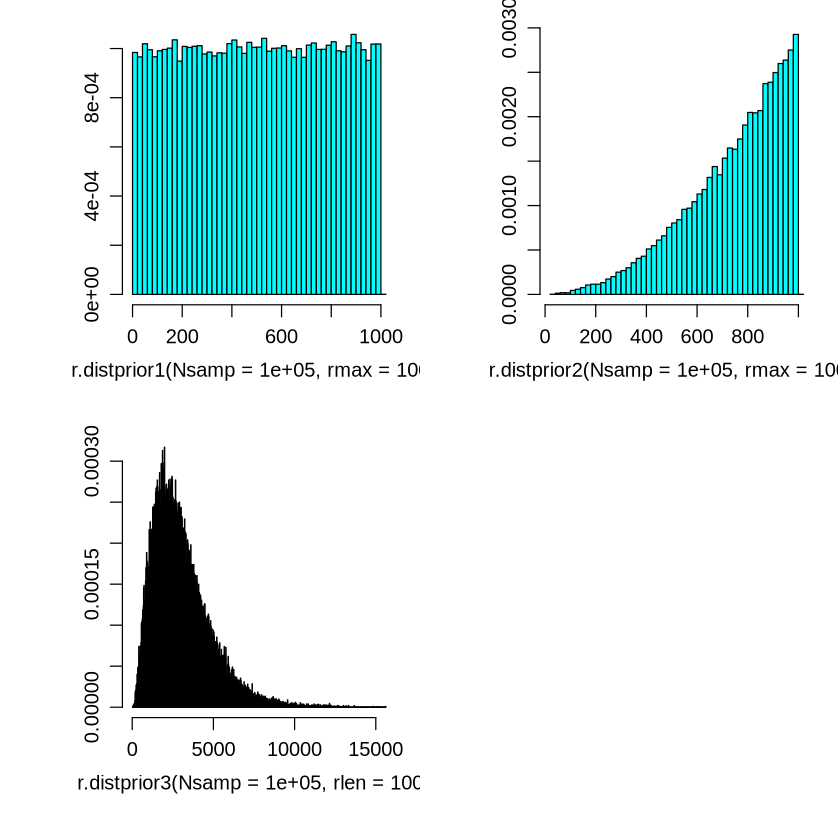

In [8]:
# Setting paths ----------------------------------------------------------------
root_dir <- file.path("/home/juanjo/CHESS/BayesianDistances/parallax-tutorial-2018/")
                             # directory containing Rcode/ and data/ directories
setwd(file.path(root_dir, "Rcode"))

## Importing the functions at Rcode directory ----------------------------------
source("general_functions.R")
source("distance_functions.R")

setwd("../")
mypalette <- colorRampPalette(brewer.pal(9, "Greys"), space="rgb", 
                              interpolate="linear", bias=2.5)
mycols <- mypalette(64)

# Plot the priors to get feel for what they look like.
# To check the code, we draw from distance priors and plot the samples as a 
# histogram. 
# 1,2,3 are uniform in distance, uniform space density, and exponentially 
# decreasing space density, respectively.
par(mfrow=c(2,2), mar=c(5,5,0.5,1), oma=c(0.1,0.1,0.5,0.1), mgp=c(2.2,0.8,0), 
    cex=1.0) 
truehist(r.distprior1(Nsamp=1e5, rmax=1e3), h=20)
truehist(r.distprior2(Nsamp=1e5, rmax=1e3), h=20)
truehist(r.distprior3(Nsamp=1e5, rlen=1e3), h=20)


In [9]:
# Estimating the Bayesian distances for the entire data ------------------------
rlen <- 1e3
probabilities <- c(0.0015, 0.025, 0.16, 0.50, 0.84, 0.975, 0.9985)

distance_mode    <- vector()
distance_fwhm    <- vector()
distance_0015    <- vector()
distance_0250    <- vector()
distance_1600    <- vector()
distance_5000    <- vector()
distance_8400    <- vector()
distance_9750    <- vector()
distance_9985    <- vector()
distance_fwhm_hi <- vector()
distance_fwhm_lo <- vector()

initial_time <- proc.time()

In [ ]:
a<--1
for(i in 1:lengths(parallax)){
    # parallax[i,] == NaN verification
    if (is.na(catalogue$parallax_zpt_corr[i]) || is.nan(catalogue$parallax_zpt_corr[i])) {
        next  # Salta al siguiente valor en el bucle
    }

    a<-a+1
    print(a)
    
    distance_mode[i]      <- mode.distpost3(w=parallax[i,], 
                                            wsd=parallax_error[i,], rlen)
    
    distance_fwhm         <- fwhm.distpost3(parallax[i,], parallax_error[i,],
                                            rMode=distance_mode[i], rlen,
                                            rmax=1e6)
    
    distance_fwhm_hi[i]   <- distance_fwhm['hi']
    distance_fwhm_lo[i]   <- distance_fwhm['lo']
    

    distance_quantiles <- quantiles.distpost3(parallax[i,],
                                              parallax_error[i,], rlen,
                                              probs=probabilities, Nsamp=1e5)
    
    distance_0015[i] <- distance_quantiles['0.15%']
    distance_0250[i] <- distance_quantiles['2.5%']
    distance_1600[i] <- distance_quantiles['16%']
    distance_5000[i] <- distance_quantiles['50%']
    distance_8400[i] <- distance_quantiles['84%']
    distance_9750[i] <- distance_quantiles['97.5%']
    distance_9985[i] <- distance_quantiles['99.85%']
}

end_time <- proc.time()

print((end_time-initial_time)/60., "minutes") # last time it took around 45 min

In [ ]:
# Combining the outputs in a self-contained data frame -------------------------

distances_df <- data.frame(cbind(distance_mode, distance_fwhm_hi, 
                                 distance_fwhm_lo, distance_0015, distance_0250, 
                                 distance_1600, distance_5000, distance_8400, 
                                 distance_9750, distance_9985))

header_names <- c("distance_mode", "distance_fwhm_high", "distance_fwhm_low", 
                  "distance_0.015%", "distance_2.5%", "distance_16%", 
                  "distance_50%", "distance_84%", "distance_97.5%",
                  "distance_99.85%")

colnames(distances_df) <- header_names

In [13]:
distances_df

distance_mode,distance_fwhm_high,distance_fwhm_low,distance_0.015%,distance_2.5%,distance_16%,distance_50%,distance_84%,distance_97.5%,distance_99.85%
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
33.20626,33.25852,33.15413,33.09776,33.13009,33.17006,33.20636,33.25116,33.29638,33.33914
31.83446,31.90219,31.76701,31.63257,31.73662,31.77625,31.84112,31.89521,31.93917,32.00848
31.83446,31.90219,31.76701,31.66994,31.73492,31.77105,31.82737,31.88683,31.93373,32.00305
98.73721,100.32930,97.19487,94.97180,96.20966,97.38586,98.81475,100.13587,101.39385,103.21608
126.49151,128.15900,124.86687,122.78273,123.93115,125.31490,126.53548,127.88242,129.23673,130.95466
76.12708,76.62634,75.63426,74.92241,75.31618,75.74720,76.13286,76.52936,76.93587,77.37624
17.90757,17.91857,17.89657,17.87221,17.88734,17.89560,17.90588,17.91313,17.92032,17.93896
17.90757,17.91857,17.89657,17.88290,17.88773,17.89978,17.90957,17.91751,17.92189,17.92756
21.13844,21.14746,21.12944,21.12730,21.12730,21.13073,21.13662,21.14576,21.15020,21.15464


In [14]:
# Combining the generated data frame with the original one ---------------------

new_df <- data.frame(cbind(catalogue, distances_df))

write.csv(new_df, file.path(data_dir, 
                           "catalogue_zpt_bayesdist_new.csv"),
         row.names = FALSE, quote = FALSE)

write.csv(new_df, file.path(data_dir, "test.csv"),
          row.names = FALSE, quote = FALSE)